In [89]:
def SQL_query(query=None):
    import mysql.connector
    mydb =  mysql.connector.connect(
      host="localhost",
      user="hsucheng",
      password="hsucheng",
      database = 'Book_Crossing'
    )
    cursor = mydb.cursor()
    cursor.execute(query)
    values = cursor.fetchall()
    return values

Target Label : rating
User feature : user_id, age, location
Item feature : isbn, book_author, publisher, year_of_publication

Target Label DA

In [90]:
query = 'SELECT rating FROM user_book_rating'
values = SQL_query(query=query)

import pandas as pd
data = [values[i][0] for i in range(len(values))]
df = pd.DataFrame({'rating':data})

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df['rating'].value_counts().iplot(kind='bar',
                                  xTitle='Rating',
                                  yTitle='Counts',
                                  title='Rating Distribution',
                                  color='blue')
print('target label : ',set(df['rating']))

target label :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


Numerical / Categorical feature DA

In [92]:
query = 'SELECT user_id,age FROM user_feature'
values = SQL_query(query=query)

import pandas as pd
data = [values[i][1] for i in range(len(values))]
df = pd.DataFrame({'age':data})

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df['age'].value_counts().iplot(kind='bar',
                                  xTitle='age',
                                  yTitle='Counts',
                                  title='age Distribution',
                                  color='green')

Categorical Feature and Target Label DA

In [119]:
def Interaction_Num_In_Categorical(df=None, feature1=None, feature2=None):
    feature1 = list(df[feature1])
    feature2 = list(df[feature2])
    feature12feature2 = dict()
    for f1 in set(feature1):
        feature12feature2[f1] = dict()
        for f2 in set(feature2):
            feature12feature2[f1][f2] = 0
    for i in range(len(feature1)):
        f1, f2 = feature1[i], feature2[i]
        feature12feature2[f1][f2] +=1
    feature1_index = sorted(set(feature1))
    feature2_index = sorted(set(feature2))
    df_data = dict()
    for f1 in feature1_index:
        f1_data = feature12feature2[f1]
        df_data[f1] = [f1_data[f2] for f2 in feature2_index]
    return pd.DataFrame(df_data,index=feature2_index)

Text(33.0, 0.5, 'rating')

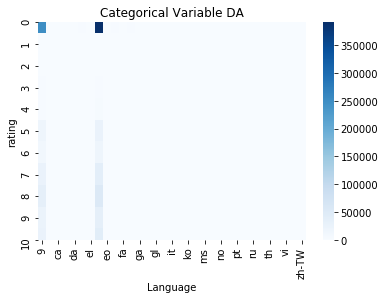

In [122]:
import pandas as pd
data = pd.read_csv('Preprocessed_data.csv')
df = data[['age','Language','rating']]
df_ = Interaction_Num_In_Categorical(df=df, feature1='Language', feature2='rating')

import seaborn as sns
sns.heatmap(data=df_,cmap='Blues')
plt.title('Categorical Variable DA')
plt.xlabel('Language')
plt.ylabel('rating')

Numerical Feature and Target Label DA

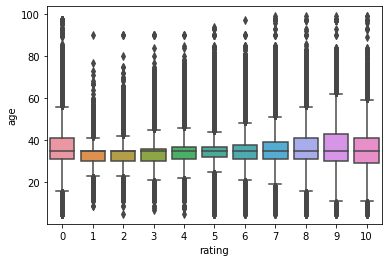

In [117]:
import pandas as pd
data = pd.read_csv('Preprocessed_data.csv')
df = data[['age','Language','rating']]
import seaborn as sns
rating = df['rating']
ax = sns.boxplot(x="rating", y="age", data=df)

Interacation DA

In [46]:
class Interaction_Module:
    def __init__(self):
        from scipy.stats import entropy
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
    def df_init(self,df=None,feature1=None,feature2=None,target_feature=None):
        self.df = df
        self.feature1 = feature1
        self.feature2 = feature2
        self.target_feature = target_feature
        self.f1_name = sorted(set(self.df[self.feature1]))
        self.f2_name = sorted(set(self.df[self.feature2]))
        self.tf_name = sorted(set(self.df[self.target_feature]))
    def Specific_Constraint_Organic_func(self,f1_c=None,f2_c=None):
        tf_on_c = self.df[(self.df[self.feature1] == f1_c) & (self.df[self.feature2] == f2_c)][self.target_feature]
        return list(tf_on_c)
    def Information_Entropy_func(self, nums=[None]):
        return entropy(nums, base=2)
    def interaction_matrix_init(self):
        dict_inter_mat, self.dict_inter_hist_mat = dict(), dict()
        for f1 in sorted(self.f1_name):
            dict_inter_mat[f1] = dict()
            self.dict_inter_hist_mat[f1] = dict()
            for f2 in sorted(self.f2_name):
                organic_nums = self.Specific_Constraint_Organic_func(f1_c=f1,f2_c=f2)
                ie_ = self.Information_Entropy_func(nums=organic_nums)
                dict_inter_mat[f1][f2] = ie_
                self.dict_inter_hist_mat[f1][f2] = organic_nums
        self.df_inter_mat =  pd.DataFrame(dict_inter_mat,index=sorted(self.f2_name))
    def plot_heatmap(self):
        ax = sns.heatmap(self.df_inter_mat, cmap="coolwarm")
    def show_info(self):
        print('======================================')
        print('feature1 : ',self.feature1)
        print('feature2 : ',self.feature2)
        print('target feature : ',self.target_feature)
        print('--------------------------------------')
        print('feature1 content : ', self.f1_name)
        print('feature2 content : ', self.f2_name)
        print('target label content : ', self.tf_name)
        print('======================================')
    def plot_hist_specific(self, f1_sp_name=None, f2_sp_name=None):
        s1 = IM_obj.f1_name[1]
        s2 = IM_obj.f2_name[0]
        tf = IM_obj.tf_name
        val = self.dict_inter_hist_mat[f1_sp_name][f2_sp_name]
        tf2val = dict()
        for t in tf:
            tf2val[t] = 0
        for v in val:
            tf2val[v] +=1
        df_ = pd.DataFrame({'x':tf,'y':[tf2val[t] for t in tf]})
        ax = df_.plot.bar(x='x', y='y', rot=0)

In [47]:
import pandas as pd
from scipy.stats import entropy
data = pd.read_csv('Preprocessed_data.csv')
df = data[['age','Language','rating']]

age = list(df['age'])
age_catgory = list()
for i in range(len(age)):
    value = age[i]
    if value > 0 and value <= 20:
        value = '0~20'
    elif value > 20 and value <= 30:
        value = '20~30'
    elif value > 30 and value <= 40:
        value = '30~40'
    elif value > 40 and value <= 50:
        value = '40~50'
    elif value > 50 and value <= 60:
        value = '50~60'
    else:
        value = '60up'
    age_catgory.append(value)
    
import pandas as pd
Language = list(df['Language'])
Language_data = list()
for ln in Language:
    if ln == 'en' or ln == '9':
        Language_data.append(ln)
    else:
        Language_data.append('other')
Language = Language_data
rating = list(df['rating'])
rating = [rating[i] for i in range(len(rating))]
df = pd.DataFrame({'age':age_catgory,'Language':Language,'rating':rating})

    
IM_obj = Interaction_Module()
IM_obj.df_init(df=df,feature1='age',feature2='Language',target_feature='rating')
IM_obj.interaction_matrix_init()

In [48]:
IM_obj.df_inter_mat

,0~20,20~30,30~40,40~50,50~60,60up
9,12.752893,14.838803,16.169316,14.227868,13.570091,11.826093
en,13.425803,15.343968,16.785901,14.889768,14.183402,12.507686
other,8.870450,11.180228,11.432857,9.422552,7.986786,4.709394


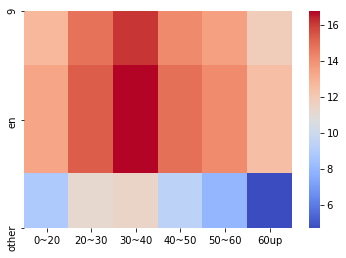

In [49]:
import seaborn as sns
IM_obj.plot_heatmap()

In [50]:
IM_obj.show_info()

feature1 :  age
feature2 :  Language
target feature :  rating
--------------------------------------
feature1 content :  ['0~20', '20~30', '30~40', '40~50', '50~60', '60up']
feature2 content :  ['9', 'en', 'other']
target label content :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


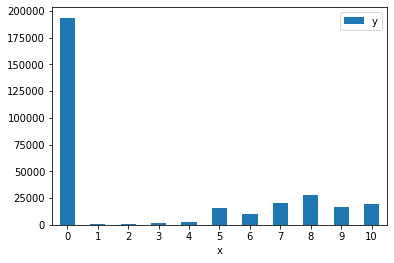

In [51]:
import pandas as pd
from scipy.stats import entropy
data = pd.read_csv('Preprocessed_data.csv')
df = data[['age','Language','rating']]
IM_obj.plot_hist_specific(f1_sp_name='30~40', f2_sp_name='en')

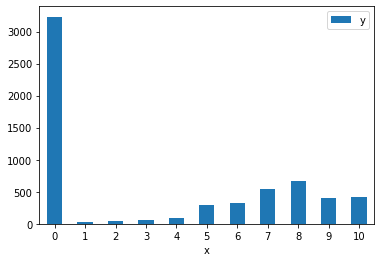

In [54]:
IM_obj.plot_hist_specific(f1_sp_name='30~40', f2_sp_name='other')

Numerical Pair plot

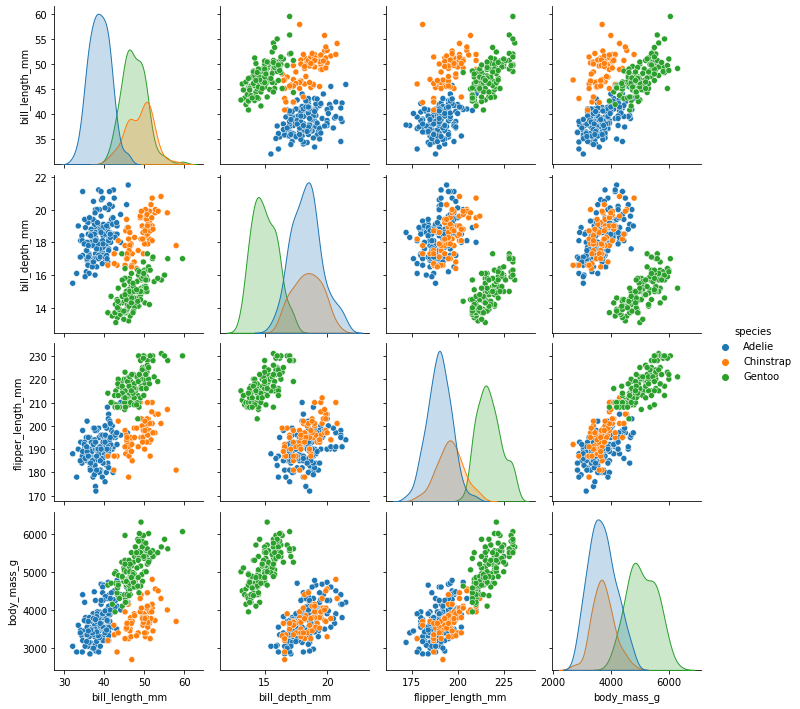

In [23]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue="species")

In [42]:
import pandas as pd
from scipy.stats import entropy
data = pd.read_csv('Preprocessed_data.csv')
df__ = data[['age','year_of_publication','rating']]

In [37]:
age = list(df['age'])
age_catgory = list()
for i in range(len(age)):
    value = age[i]
    if value > 0 and value <= 20:
        value = '0~20'
    elif value > 20 and value <= 30:
        value = '20~30'
    elif value > 30 and value <= 40:
        value = '30~40'
    elif value > 40 and value <= 50:
        value = '40~50'
    elif value > 50 and value <= 60:
        value = '50~60'
    else:
        value = '60up'
    age_catgory.append(value)

In [38]:
import pandas as pd
Language = list(df['Language'])
Language_data = list()
for ln in Language:
    if ln == 'en' or ln == '9':
        Language_data.append(ln)
    else:
        Language_data.append('other')
Language = Language_data
rating = list(df['rating'])
rating = [rating[i] for i in range(len(rating))]
df = pd.DataFrame({'age':age_catgory,'Language':Language,'rating':rating})

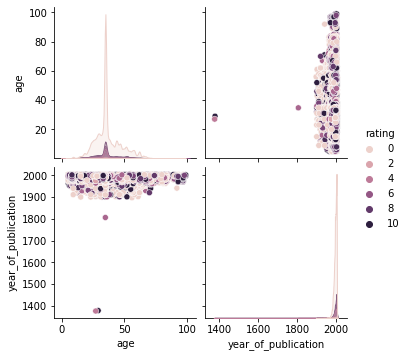

In [43]:
import seaborn as sns
sns.pairplot(df__, hue="rating")

In [19]:
query = 'select * from book_feature'
values = SQL_query(query=query)

NameError: name 'SQL_query' is not defined

In [20]:
query = '''
select age , rating
from user_book_rating
join user_feature
on user_book_rating.user_id = user_feature.user_id
'''
values = SQL_query(query=query)

NameError: name 'SQL_query' is not defined

In [104]:
import pandas as pd
data = pd.read_csv('Preprocessed_data.csv')
df = data[['age','Language','rating']]

In [105]:
age = list(df['age'])
age_catgory = list()
for i in range(len(age)):
    value = age[i]
    if value > 0 and value <= 20:
        value = '0~20'
    elif value > 20 and value <= 30:
        value = '20~30'
    elif value > 30 and value <= 40:
        value = '30~40'
    elif value > 40 and value <= 50:
        value = '40~50'
    elif value > 50 and value <= 60:
        value = '50~60'
    else:
        value = '60up'
    age_catgory.append(value)

In [106]:
import pandas as pd
Language = list(df['Language'])
Language_data = list()
for ln in Language:
    if ln == 'en' or ln == '9':
        Language_data.append(ln)
    else:
        Language_data.append('other')
Language = Language_data
rating = list(df['rating'])
rating = [rating[i] for i in range(len(rating))]
df = pd.DataFrame({'age':age_catgory,'Language':Language,'rating':rating})

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# data
x=Language
y=age_catgory
z=rating

# create pandas dataframe
data_list = pd.DataFrame(
    {'x_axis': x,
     'y_axis': y,
     'category': z
    })

# change size of data points
minsize = min(data_list['y_axis'])
maxsize = max(data_list['y_axis'])

# scatter plot
sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category", data=data_list)
plt.grid()

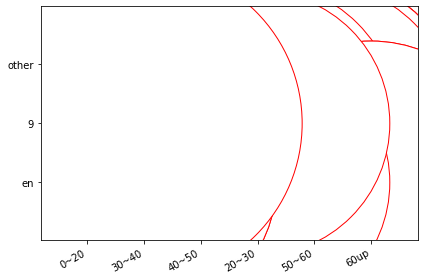

In [101]:
import matplotlib.pyplot as plt
fig = plt.figure()
#plot categorical scatter plot
plt.scatter(df.age, df.Language, s = df.rating, edgecolors = "red", c = "white", zorder = 2)
#plot grid behind markers
plt.grid(ls = "--", zorder = 1)
#take care of long labels
fig.autofmt_xdate()
plt.tight_layout()

In [16]:
query = 'SELECT * FROM user_book_rating'
values = SQL_query(query=query)

In [25]:
query = 'SELECT user_id,age FROM user_feature'
values = SQL_query(query=query)

In [20]:
query = 'SELECT isbn,Language FROM book_feature'
values = SQL_query(query=query)

In [26]:
import pandas as pd
data = [values[i][1] for i in range(len(values))]
df = pd.DataFrame({'age':data})
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df['age'].value_counts().iplot(kind='bar',
                                  xTitle='age',
                                  yTitle='Counts',
                                  title='age Distribution',
                                  color='green')

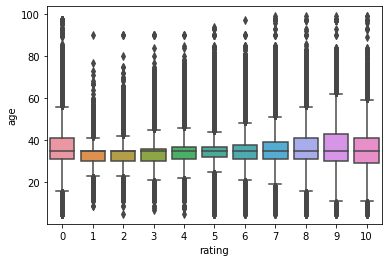

In [58]:
import seaborn as sns
rating = df['rating']
ax = sns.boxplot(x="rating", y="age", data=df)
#ax = sns.swarmplot(x="age", y="rating", data=df, color=".25")
#rating

In [70]:
df_ = df[['Language','rating']]

In [80]:
Language = list(df['Language'])
rating = list(df['rating'])
Language2rating = dict()
for ln in set(Language):
    Language2rating[ln] = dict()
    for rat in set(rating):
        Language2rating[ln][rat] = 0
for i in range(len(Language)):
    ln = Language[i]
    rat = rating[i]
    Language2rating[ln][rat] +=1
rating_index = sorted(set(rating))
Language_col = list(set(Language))

In [81]:
pd_data = dict()
for ln in Language_col:
    rat_data = Language2rating[ln]
    pd_data[ln] = [rat_data[rat] for rat in rating_index]
df_ = pd.DataFrame(pd_data,index=rating_index)
print(df_)

    ru       9   it  sv    es  hi  tl  no    fr  gl  ...  da      en  ga  \
0   10  249338  368   1  1573   1   1   7  1735  10  ...  69  391015   3   
1    0     552    1   0     4   0   0   0    12   0  ...   0     876   0   
2    0     961    3   0     6   0   0   0    16   0  ...   0    1351   0   
3    0    1973    4   0    21   0   0   0    21   1  ...   0    3005   0   
4    0    2987    5   0    38   0   0   2    32   0  ...   1    4436   0   
5    1   18054   24   0   201   0   0   1    97   1  ...   2   26649   0   
6    0   12382   28   0   221   0   0   0   136   0  ...   5   18612   0   
7    0   26292   72   0   391   0   0   2   315   0  ...   5   38818   0   
8    5   35852  101   0   442   0   0   0   399   1  ...  16   54349   1   
9    2   23225   52   0   282   0   0   0   250   0  ...  10   36510   0   
10   5   27321   74   0   246   0   0   1   210   0  ...  11   42884   0   

      de  ar  eo  pt  el  gd  vi  
0   2963   3   1  34   4   1   2  
1     34   0   0 

Text(33.0, 0.5, 'rating')

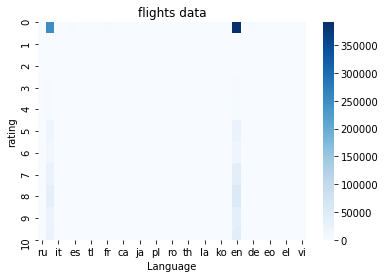

In [85]:
sns.heatmap(data=df_,cmap='Blues')
plt.title('flights data')
plt.xlabel('Language')
plt.ylabel('rating')

In [1]:
import pandas as pd
data = pd.read_csv('Preprocessed_data.csv')
df = data[['age','Language','rating']]

In [41]:
age = list(df['age'])
age_catgory = list()
for i in range(len(age)):
    value = age[i]
    if value > 0 and value <= 20:
        value = '0~20'
    elif value > 20 and value <= 30:
        value = '20~30'
    elif value > 30 and value <= 40:
        value = '30~40'
    elif value > 40 and value <= 50:
        value = '40~50'
    elif value > 50 and value <= 60:
        value = '50~60'
    else:
        value = '60up'
    age_catgory.append(value)
Language = list(df['Language'])
Language_data = list()
for ln in Language:
    if ln == 'en' or ln == '9':
        Language_data.append(ln)
    else:
        Language_data.append('other')
Language = Language_data
rating = list(df['rating'])
rating = [rating[i] for i in range(len(rating))]
df = pd.DataFrame({'age':age_catgory,'Language':Language,'rating':rating})

In [11]:
def Interaction_Num_In_Categorical(df=None, feature1=None, feature2=None):
    feature1 = list(df[feature1])
    feature2 = list(df[feature2])
    feature12feature2 = dict()
    for f1 in set(feature1):
        feature12feature2[f1] = dict()
        for f2 in set(feature2):
            feature12feature2[f1][f2] = 0
    for i in range(len(feature1)):
        f1, f2 = feature1[i], feature2[i]
        feature12feature2[f1][f2] +=1
    feature1_index = sorted(set(feature1))
    feature2_index = sorted(set(feature2))
    df_data = dict()
    for f1 in feature1_index:
        f1_data = feature12feature2[f1]
        df_data[f1] = [f1_data[f2] for f2 in feature2_index]
    return pd.DataFrame(df_data,index=feature2_index)

In [12]:
Interaction_Num_In_Categorical(df=df,feature1='age',feature2='Language')

,0~20,20~30,30~40,40~50,50~60,60up
9,15505,82484,198967,56453,33803,11725
en,24737,122303,310437,88955,53054,19019
other,840,4717,6114,1494,496,72


In [18]:
df[(df['age'] == '0~20') & (df['Language'] == 'en')]

,age,Language,rating
0,0~20,en,0
46,0~20,en,0
66,0~20,en,0
104,0~20,en,0
161,0~20,en,0
...,...,...,...
1029931,0~20,en,0
1029988,0~20,en,10
1031155,0~20,en,0
1031156,0~20,en,0


In [ ]:
df[(df['age'] == '0~20') & (df['Language'] == 'en')]['rating']

In [77]:
class Interaction_Module:
    def __init__(self):
        from scipy.stats import entropy
        import pandas as pd
        import seaborn as sns
        import matplotlib.pyplot as plt
    def df_init(self,df=None,feature1=None,feature2=None,target_feature=None):
        self.df = df
        self.feature1 = feature1
        self.feature2 = feature2
        self.target_feature = target_feature
        self.f1_name = sorted(set(self.df[self.feature1]))
        self.f2_name = sorted(set(self.df[self.feature2]))
        self.tf_name = sorted(set(self.df[self.target_feature]))
    def Specific_Constraint_Organic_func(self,f1_c=None,f2_c=None):
        tf_on_c = self.df[(self.df[self.feature1] == f1_c) & (self.df[self.feature2] == f2_c)][self.target_feature]
        return list(tf_on_c)
    def Information_Entropy_func(self, nums=[None]):
        return entropy(nums, base=2)
    def interaction_matrix_init(self):
        dict_inter_mat, self.dict_inter_hist_mat = dict(), dict()
        for f1 in sorted(self.f1_name):
            dict_inter_mat[f1] = dict()
            self.dict_inter_hist_mat[f1] = dict()
            for f2 in sorted(self.f2_name):
                organic_nums = self.Specific_Constraint_Organic_func(f1_c=f1,f2_c=f2)
                ie_ = self.Information_Entropy_func(nums=organic_nums)
                dict_inter_mat[f1][f2] = ie_
                self.dict_inter_hist_mat[f1][f2] = organic_nums
        self.df_inter_mat =  pd.DataFrame(dict_inter_mat,index=sorted(self.f2_name))
    def plot_heatmap(self):
        ax = sns.heatmap(self.df_inter_mat, cmap="coolwarm")
    def show_info(self):
        print('======================================')
        print('feature1 : ',self.feature1)
        print('feature2 : ',self.feature2)
        print('target feature : ',self.target_feature)
        print('--------------------------------------')
        print('feature1 content : ', self.f1_name)
        print('feature2 content : ', self.f2_name)
        print('target label content : ', self.tf_name)
        print('======================================')
    def plot_hist_specific(self, f1_sp_name=None, f2_sp_name=None):
        s1 = IM_obj.f1_name[1]
        s2 = IM_obj.f2_name[0]
        tf = IM_obj.tf_name
        val = self.dict_inter_hist_mat[f1_sp_name][f2_sp_name]
        tf2val = dict()
        for t in tf:
            tf2val[t] = 0
        for v in val:
            tf2val[v] +=1
        df_ = pd.DataFrame({'x':tf,'y':[tf2val[t] for t in tf]})
        ax = df_.plot.bar(x='x', y='y', rot=0)

In [78]:
IM_obj = Interaction_Module()
IM_obj.df_init(df=df,feature1='age',feature2='Language',target_feature='rating')
IM_obj.interaction_matrix_init()

In [79]:
df_inter_mat

,0~20,20~30,30~40,40~50,50~60,60up
9,12.752893,14.838803,16.169316,14.227868,13.570091,11.826093
en,13.425803,15.343968,16.785901,14.889768,14.183402,12.507686
other,8.870450,11.180228,11.432857,9.422552,7.986786,4.709394


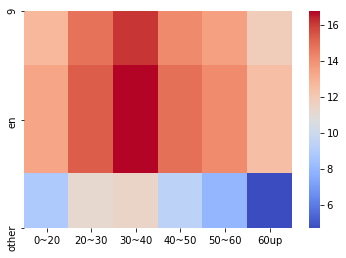

In [80]:
IM_obj.plot_heatmap()

In [81]:
IM_obj.show_info()

feature1 :  age
feature2 :  Language
target feature :  rating
--------------------------------------
feature1 content :  ['0~20', '20~30', '30~40', '40~50', '50~60', '60up']
feature2 content :  ['9', 'en', 'other']
target label content :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


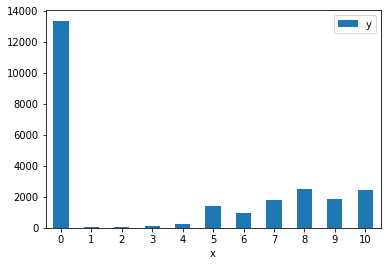

In [82]:
IM_obj.plot_hist_specific(f1_sp_name='0~20', f2_sp_name='en')

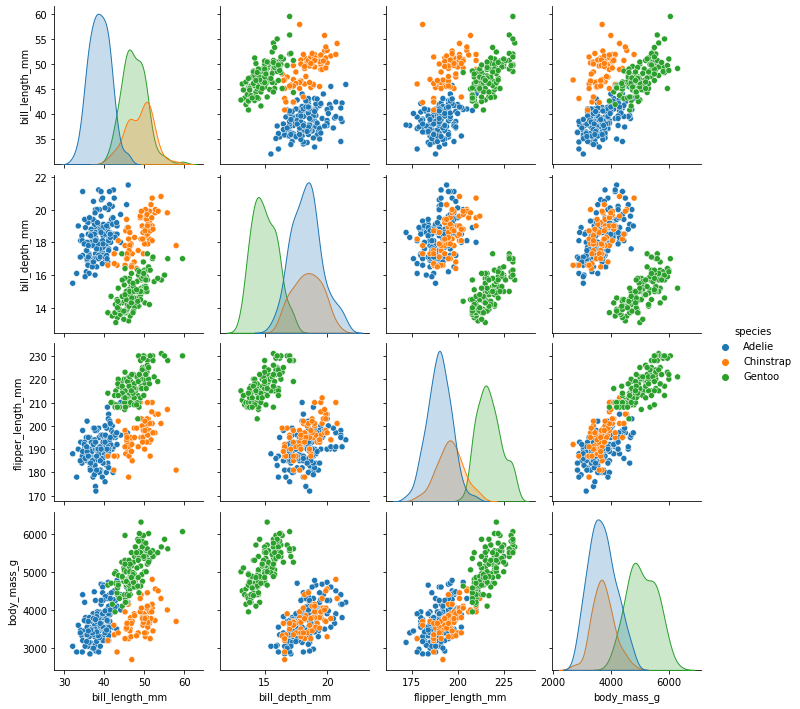

In [83]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue="species")

In [84]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [86]:
import pandas as pd
data = pd.read_csv('Preprocessed_data.csv')
sns.pairplot(data, hue="rating")

Error in callback <function flush_figures at 0x7f0fa80f78c8> (for post_execute):


KeyboardInterrupt: 